In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/test/pm10_2.csv')

In [3]:
df.tail()

,SIDO,STD_YYYYMM,AVG_PM10,PM10_BAD,PM10_80BAD
2539,충청남도,161,NaN,N,N
2540,전라북도,161,NaN,N,N
2541,전라남도,161,NaN,N,N
2542,경상북도,161,NaN,N,N
2543,제주특별자치도,161,NaN,N,N


In [4]:
df1 = pd.read_csv('data/test/pm25_2.csv')

In [5]:
df = pd.merge(df, df1, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [6]:
df.head()

,SIDO,STD_YYYYMM,AVG_PM10,PM10_BAD,PM10_80BAD,AVG_PM2.5,PM2_BAD,PM2_35BAD
0,서울특별시,201501,49.0,Y,N,25.0,Y,N
1,부산광역시,201501,47.0,Y,N,27.0,Y,N
2,대구광역시,201501,54.0,Y,N,33.0,Y,N
3,인천광역시,201501,53.0,Y,N,31.0,Y,N
4,광주광역시,201501,43.0,Y,N,27.0,Y,N


c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

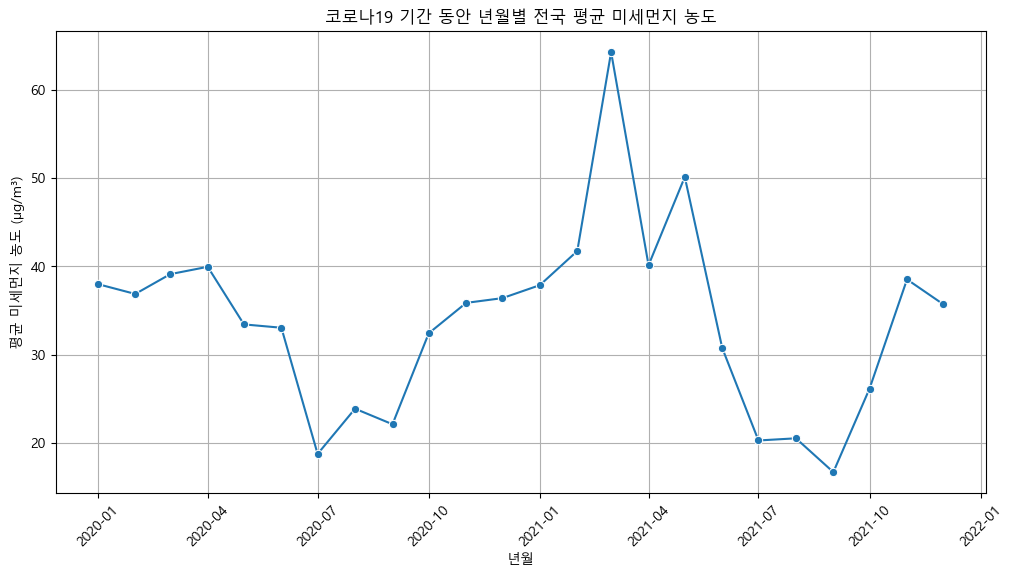

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 년월을 datetime 객체로 변환
df['STD_YYYYMM'] = pd.to_datetime(df['STD_YYYYMM'], format='%Y%m')

# 전국 평균 미세먼지 농도 계산
df_avg = df.groupby('STD_YYYYMM')['AVG_PM10'].mean().reset_index()

# 코로나19 발생 시기를 표시하기 위한 범위 설정 (예: 2020년 1월부터 2021년 12월까지)
start_date = '2020-01-01'
end_date = '2021-12-31'

# 필터링된 데이터 프레임 생성
df_filtered = df_avg[(df_avg['STD_YYYYMM'] >= start_date) & (df_avg['STD_YYYYMM'] <= end_date)]

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x='STD_YYYYMM', y='AVG_PM10', data=df_filtered, marker='o')

plt.title('코로나19 기간 동안 년월별 전국 평균 미세먼지 농도')
plt.xlabel('년월')
plt.ylabel('평균 미세먼지 농도 (μg/m³)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

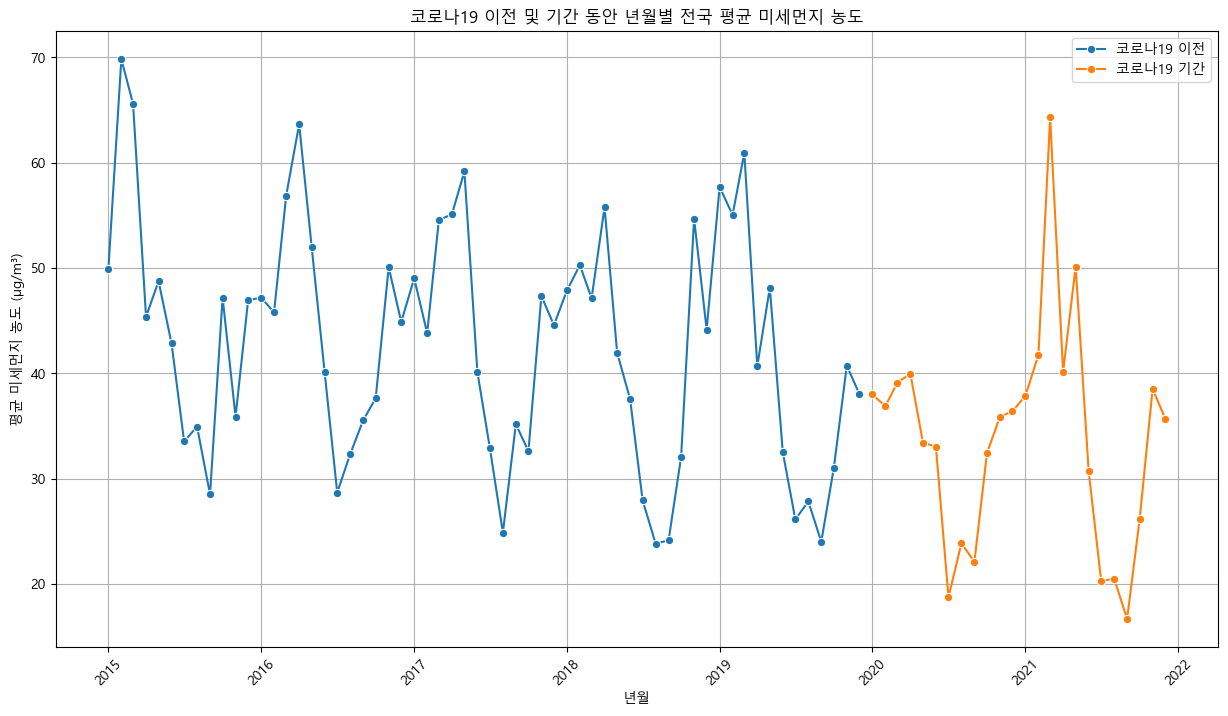

In [12]:
# 년월을 datetime 객체로 변환
df['STD_YYYYMM'] = pd.to_datetime(df['STD_YYYYMM'], format='%Y%m')

# 전국 평균 미세먼지 농도 계산
df_avg = df.groupby('STD_YYYYMM')['AVG_PM10'].mean().reset_index()

# 코로나19 이전 기간 설정 (예: 2010년 1월부터 2019년 12월까지)
pre_covid_start = '2010-01-01'
pre_covid_end = '2019-12-31'

# 코로나19 기간 설정 (예: 2020년 1월부터 2021년 12월까지)
covid_start = '2020-01-01'
covid_end = '2021-12-31'

# 필터링된 데이터 프레임 생성
df_pre_covid = df_avg[(df_avg['STD_YYYYMM'] >= pre_covid_start) & (df_avg['STD_YYYYMM'] <= pre_covid_end)]
df_covid = df_avg[(df_avg['STD_YYYYMM'] >= covid_start) & (df_avg['STD_YYYYMM'] <= covid_end)]

# 시각화
plt.figure(figsize=(15, 8))
sns.lineplot(x='STD_YYYYMM', y='AVG_PM10', data=df_pre_covid, marker='o', label='코로나19 이전')
sns.lineplot(x='STD_YYYYMM', y='AVG_PM10', data=df_covid, marker='o', label='코로나19 기간')

plt.title('코로나19 이전 및 기간 동안 년월별 전국 평균 미세먼지 농도')
plt.xlabel('년월')
plt.ylabel('평균 미세먼지 농도 (μg/m³)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

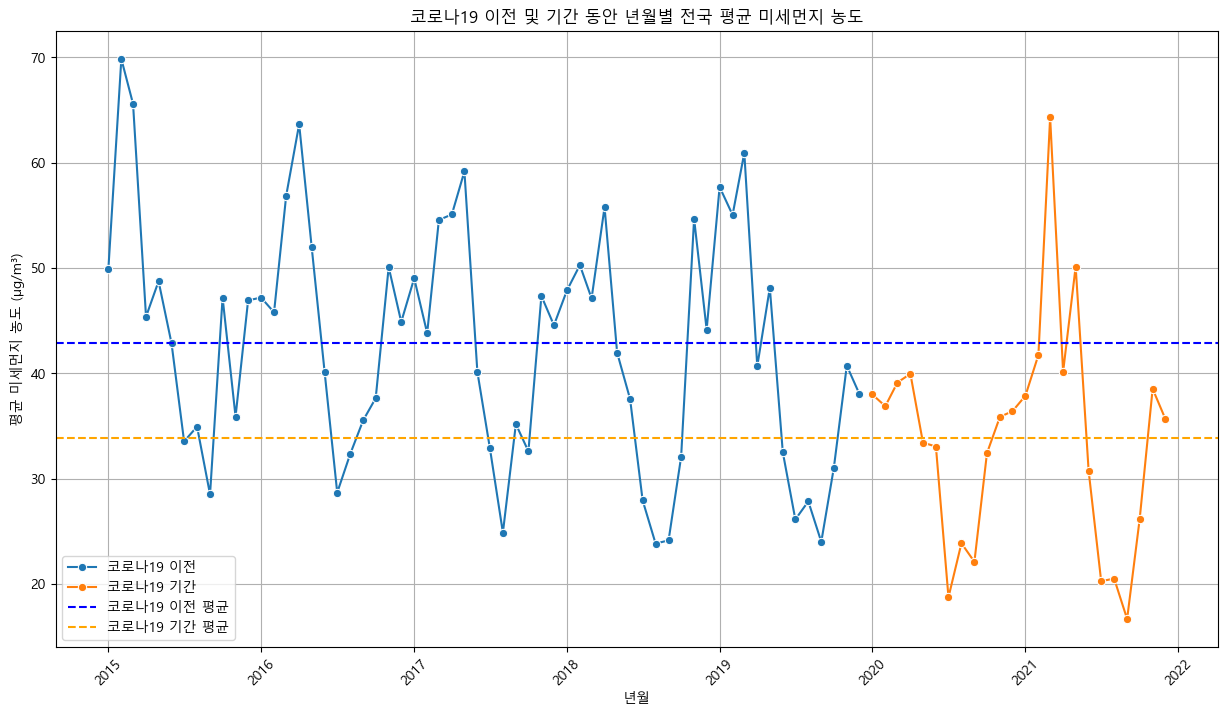

In [8]:

# 년월을 datetime 객체로 변환
df['STD_YYYYMM'] = pd.to_datetime(df['STD_YYYYMM'], format='%Y%m')

# 전국 평균 미세먼지 농도 계산
df_avg = df.groupby('STD_YYYYMM')['AVG_PM10'].mean().reset_index()

# 코로나19 이전 기간 설정
pre_covid_start = '2010-01-01'
pre_covid_end = '2019-12-31'

# 코로나19 기간 설정
covid_start = '2020-01-01'
covid_end = '2021-12-31'

# 필터링된 데이터 프레임 생성
df_pre_covid = df_avg[(df_avg['STD_YYYYMM'] >= pre_covid_start) & (df_avg['STD_YYYYMM'] <= pre_covid_end)]
df_covid = df_avg[(df_avg['STD_YYYYMM'] >= covid_start) & (df_avg['STD_YYYYMM'] <= covid_end)]

# 평균 미세먼지 농도 계산
avg_pre_covid = df_pre_covid['AVG_PM10'].mean()
avg_covid = df_covid['AVG_PM10'].mean()

# 시각화
plt.figure(figsize=(15, 8))
sns.lineplot(x='STD_YYYYMM', y='AVG_PM10', data=df_pre_covid, marker='o', label='코로나19 이전')
sns.lineplot(x='STD_YYYYMM', y='AVG_PM10', data=df_covid, marker='o', label='코로나19 기간')

# 평균선 추가
plt.axhline(avg_pre_covid, color='blue', linestyle='--', label='코로나19 이전 평균')
plt.axhline(avg_covid, color='orange', linestyle='--', label='코로나19 기간 평균')

plt.title('코로나19 이전 및 기간 동안 년월별 전국 평균 미세먼지 농도')
plt.xlabel('년월')
plt.ylabel('평균 미세먼지 농도 (μg/m³)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [9]:
dfs = pd.read_csv('data/test/pm10_2.csv')
dfs1 = pd.read_csv('data/test/일산화.csv')
dfs2 = pd.read_csv('data/test/이산화.csv')
dfs3 = pd.read_csv('data/test/pm25_2.csv')

In [10]:
dfsm = pd.merge(dfs, dfs1, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [11]:
dfsm = pd.merge(dfsm, dfs2, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [12]:
dfsm = pd.merge(dfsm, dfs3, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [13]:
dfsm.head(2)

,SIDO,STD_YYYYMM,AVG_PM10,PM10_BAD,PM10_80BAD,AVG_일산화,일산화_9BAD,일산화_BAD,AVG_이산화,이산화_0.06BAD,이산화_0.03BAD,이산화_BAD,AVG_PM2.5,PM2_BAD,PM2_35BAD
0,서울특별시,201501,49.0,Y,N,0.7,N,Y,0.037,N,Y,Y,25.0,Y,N
1,부산광역시,201501,47.0,Y,N,0.4,N,N,0.022,N,N,Y,27.0,Y,N


c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

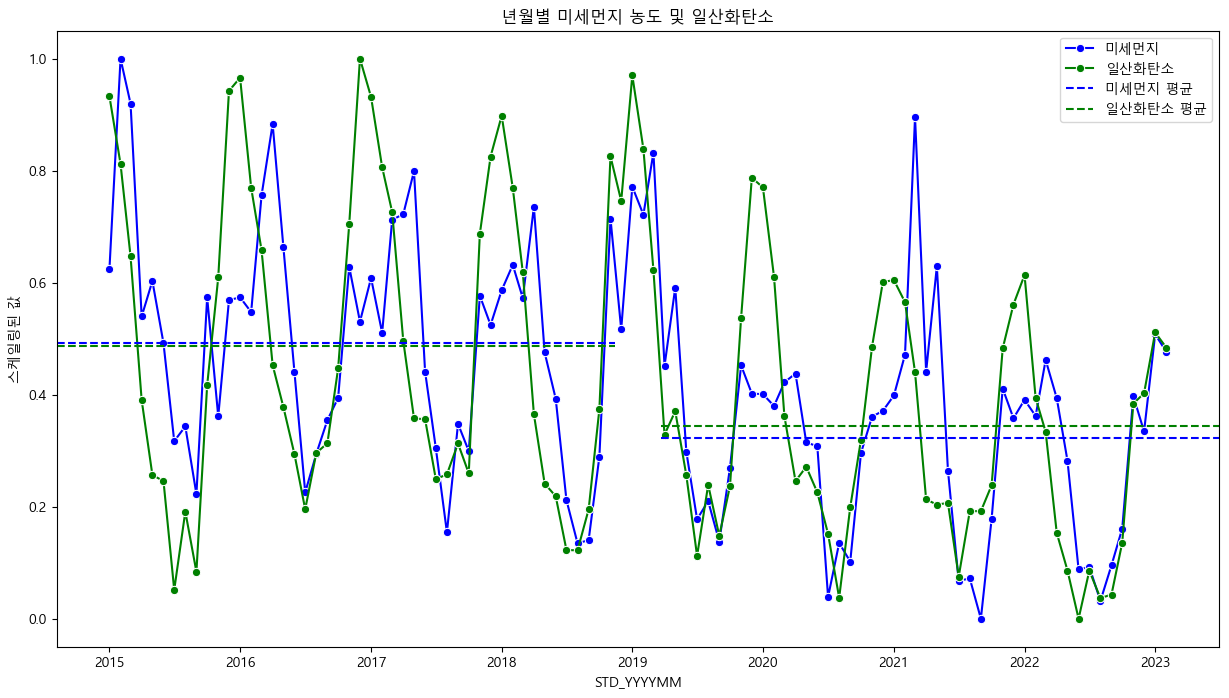

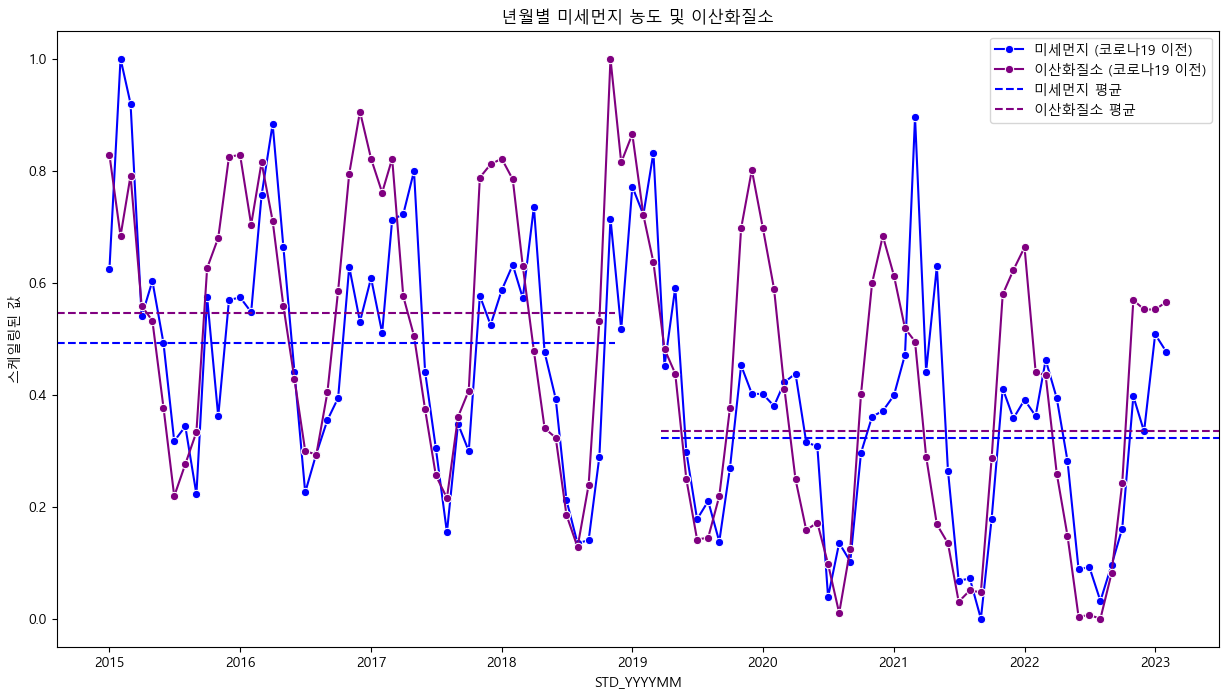

In [14]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 년월을 datetime 객체로 변환
dfsm['STD_YYYYMM'] = pd.to_datetime(dfsm['STD_YYYYMM'], format='%Y%m')

# 전국 평균 미세먼지 농도 및 환자 수 계산
dfsm_avg = dfsm.groupby('STD_YYYYMM').agg({
    'AVG_PM10': 'mean',
    'AVG_일산화': 'sum',   # 일산화탄소
    'AVG_이산화': 'sum'  # 이산화질소
}).reset_index()

# Min-Max 스케일링
scaler = MinMaxScaler()
dfsm_avg[['AVG_PM10', 'AVG_일산화', 'AVG_이산화']] = scaler.fit_transform(dfsm_avg[['AVG_PM10', 'AVG_일산화', 'AVG_이산화']])

# 코로나19 이전과 이후 기간 설정
pre_covid_start = '2010-01-01'
pre_covid_end = '2019-12-31'
covid_start = '2020-01-01'
covid_end = '2021-12-31'

# 필터링된 데이터 프레임 생성
dfsm_pre_covid = dfsm_avg[(dfsm_avg['STD_YYYYMM'] >= pre_covid_start) & (dfsm_avg['STD_YYYYMM'] <= pre_covid_end)]
dfsm_covid = dfsm_avg[(dfsm_avg['STD_YYYYMM'] >= covid_start) & (dfsm_avg['STD_YYYYMM'] <= covid_end)]

# 변수별 평균값 계산
avg_pm10_pre_covid = dfsm_pre_covid['AVG_PM10'].mean()
avg_pm10_covid = dfsm_covid['AVG_PM10'].mean()
avg_asthma_pre_covid = dfsm_pre_covid['AVG_일산화'].mean()
avg_asthma_covid = dfsm_covid['AVG_일산화'].mean()
avg_rhinitis_pre_covid = dfsm_pre_covid['AVG_이산화'].mean()
avg_rhinitis_covid = dfsm_covid['AVG_이산화'].mean()


# 첫 번째 그래프: 미세먼지와 AVG_일산화
fig, ax1 = plt.subplots(figsize=(15, 8))
sns.lineplot(x='STD_YYYYMM', y='AVG_PM10', data=dfsm_avg, marker='o', color='blue', label='미세먼지', ax=ax1)
sns.lineplot(x='STD_YYYYMM', y='AVG_일산화', data=dfsm_avg, marker='o', color='green', label='일산화탄소', ax=ax1)

# 코로나19 이전 평균선
ax1.axhline(avg_pm10_pre_covid, color='blue', linestyle='--', xmin=0, xmax=0.48, label='미세먼지 평균')
ax1.axhline(avg_asthma_pre_covid, color='green', linestyle='--', xmin=0, xmax=0.48, label='일산화탄소 평균')

# 코로나19 이후 평균선
ax1.axhline(avg_pm10_covid, color='blue', linestyle='--', xmin=0.52, xmax=1)
ax1.axhline(avg_asthma_covid, color='green', linestyle='--', xmin=0.52, xmax=1)


ax1.set_title('년월별 미세먼지 농도 및 일산화탄소')
ax1.set_ylabel('스케일링된 값')
ax1.legend()

# 두 번째 그래프: 미세먼지와 AVG_이산화
fig, ax2 = plt.subplots(figsize=(15, 8))
sns.lineplot(x='STD_YYYYMM', y='AVG_PM10', data=dfsm_avg, marker='o', color='blue', label='미세먼지 (코로나19 이전)', ax=ax2)
sns.lineplot(x='STD_YYYYMM', y='AVG_이산화', data=dfsm_avg, marker='o', color='purple', label='이산화질소 (코로나19 이전)', ax=ax2)

# 코로나19 이전 평균선
ax2.axhline(avg_pm10_pre_covid, color='blue', linestyle='--', xmin=0, xmax=0.48, label='미세먼지 평균')
ax2.axhline(avg_rhinitis_pre_covid, color='purple', linestyle='--', xmin=0, xmax=0.48, label='이산화질소 평균')

# 코로나19 이후 평균선
ax2.axhline(avg_pm10_covid, color='blue', linestyle='--', xmin=0.52, xmax=1)
ax2.axhline(avg_rhinitis_covid, color='purple', linestyle='--', xmin=0.52, xmax=1)



ax2.set_title('년월별 미세먼지 농도 및 이산화질소')
ax2.set_ylabel('스케일링된 값')
ax2.legend()

plt.show()